In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa

from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Formatting and Loading dataset - Successful')

Formatting and Loading dataset - Successful


In [3]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [4]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [5]:
len(paths)

5600

In [6]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [7]:
df['label'].value_counts()

fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: label, dtype: int64

In [8]:
import librosa
import soundfile as sf
import numpy as np
from IPython.display import Audio

audio_path = '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav'
audio, sample_rate = librosa.load(audio_path, sr=None)

duration = len(audio) / sample_rate  
noise = np.random.normal(0, 0.1, len(audio))  

noisy_audio = audio + noise

Audio(noisy_audio, rate=sample_rate)


In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(8,3))
    plt.title(emotion, size=15)
    plt.plot(data)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(8,3))
    plt.title(emotion, size=15)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

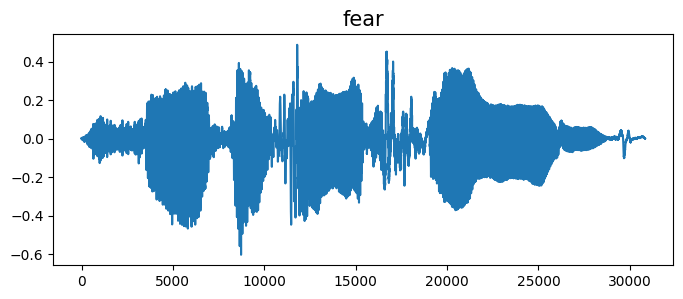

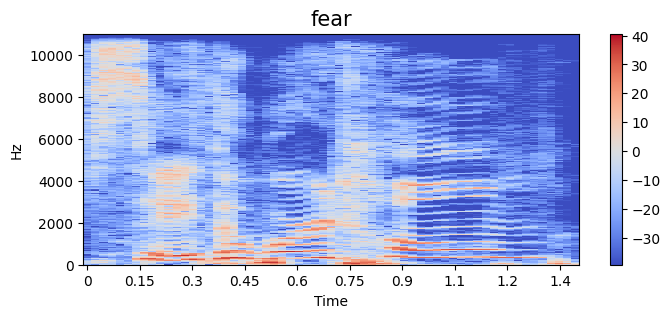

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


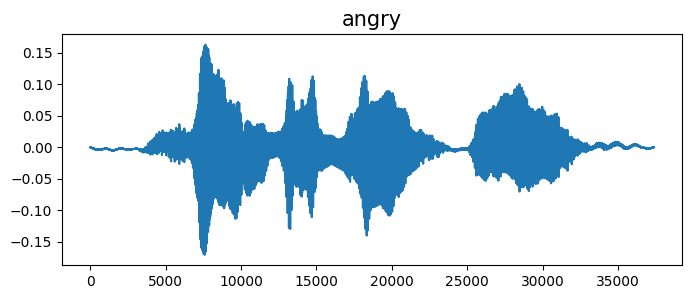

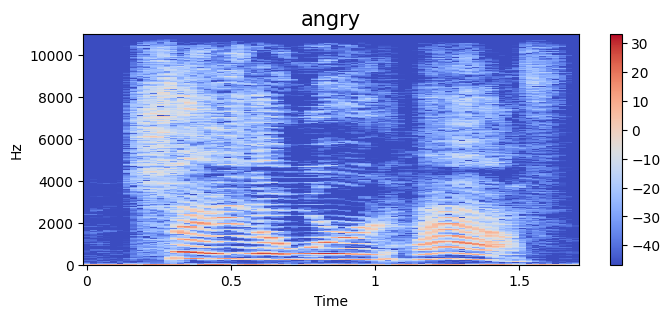

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

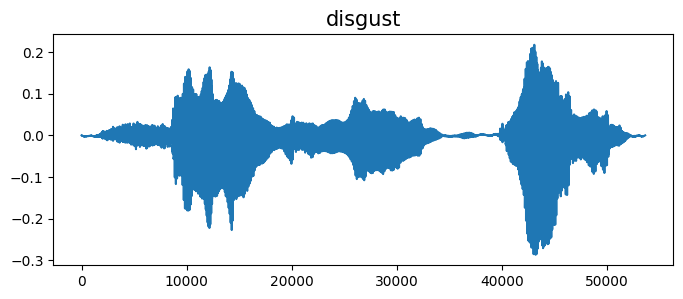

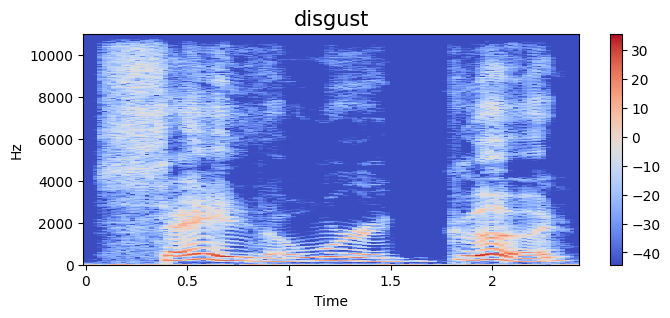

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

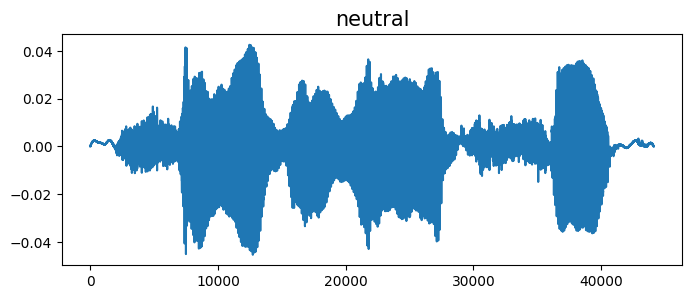

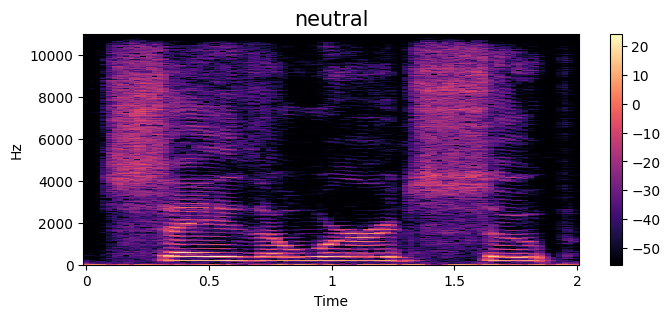

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

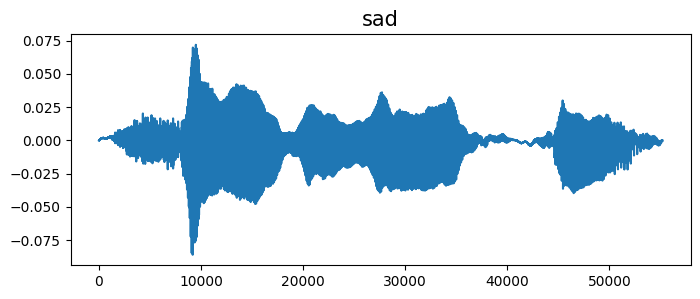

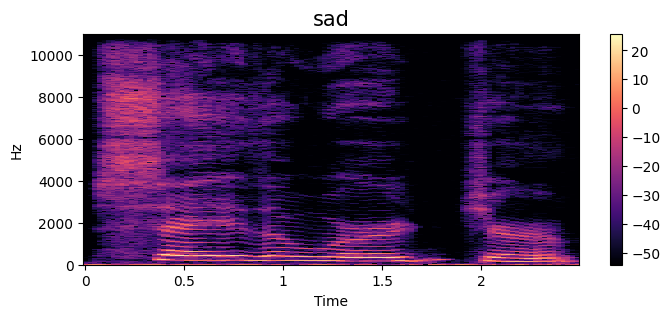

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

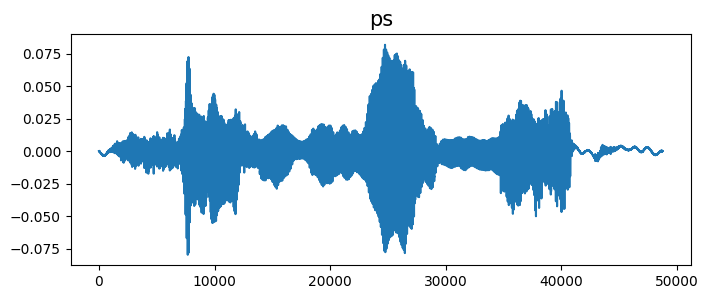

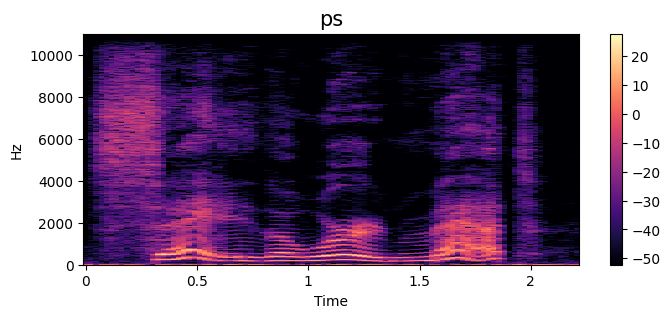

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

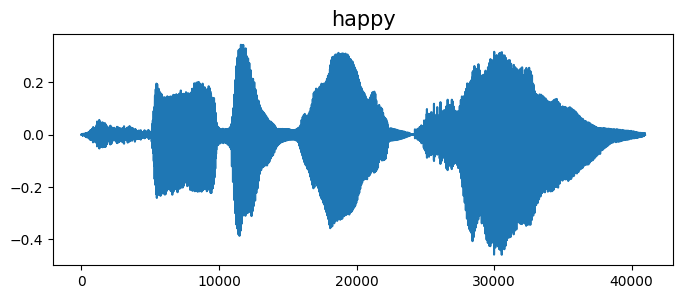

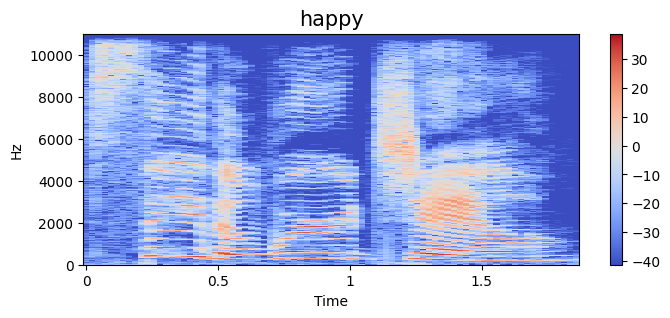

In [16]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-285.73727   ,   85.78295   ,   -2.1689112 ,   22.125532  ,
        -14.757395  ,   11.051346  ,   12.412449  ,   -3.0002618 ,
          1.0844991 ,   11.078272  ,  -17.41966   ,   -8.093213  ,
          6.5879726 ,   -4.2209535 ,   -9.15508   ,    3.52148   ,
        -13.186381  ,   14.078853  ,   19.66973   ,   22.725618  ,
         32.57464   ,   16.325035  ,   -3.8427293 ,    0.89629656,
        -11.239262  ,    6.653462  ,   -2.5883696 ,   -7.7140164 ,
        -10.941658  ,   -2.4007547 ,   -5.281288  ,    4.271157  ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.869744  ,
         -1.6027985 ,    2.5600514 ,   11.454374  ,   11.233449  ],
      dtype=float32)

In [19]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [20]:
X_mfcc

0       [-285.73727, 85.78295, -2.1689112, 22.125532, ...
1       [-348.34332, 35.193233, -3.841328, 14.658875, ...
2       [-340.11435, 53.796444, -14.267782, 20.884027,...
3       [-306.63422, 21.259708, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
5595    [-374.3952, 60.864998, 0.025059083, 8.431058, ...
5596    [-313.96478, 39.847843, -5.6493053, -3.867575,...
5597    [-357.54886, 77.886055, -15.224756, 2.194633, ...
5598    [-353.1474, 101.68391, -14.175896, -12.037376,...
5599    [-389.4595, 54.042767, 1.346998, -1.4258983, -...
Name: speech, Length: 5600, dtype: object

In [21]:
from scipy.signal import lfilter
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import librosa
import numpy as np
import matplotlib.pyplot as plt

def extract_lpc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    order = 12  
    frame_length = int(0.025 * sr)  
    hop_length = int(0.010 * sr)  
    
    frames = librosa.util.frame(y, frame_length=frame_length, hop_length=hop_length).T
    frames = frames * np.hamming(frame_length)
    
    r = np.array([np.correlate(frame, frame, mode='full') for frame in frames])
    
    lpc_coeffs = np.array([lfilter([1] + a[1:], [1], frame) for a, frame in zip(r[:, :order], frames)])
    lpc_coeffs_flattened = lpc_coeffs.flatten()

    scaler = StandardScaler()
    lpc_coeffs_scaled = scaler.fit_transform(lpc_coeffs_flattened.reshape(-1, 1))

    pca = PCA(n_components=1)  
    lpc_pca = pca.fit_transform(lpc_coeffs_scaled)
    
    return lpc_pca

In [22]:
extract_lpc(df['speech'][0])

array([[-6.90330391e-04],
       [-1.58982400e-05],
       [-1.41148044e-04],
       ...,
       [-1.47341953e-02],
       [-1.46015536e-02],
       [-1.43993285e-02]])

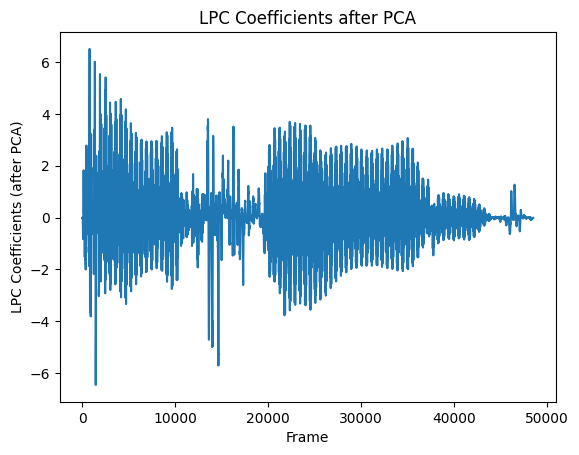

In [23]:
plt.plot(extract_lpc(df['speech'][0]))
plt.xlabel('Frame')
plt.ylabel('LPC Coefficients (after PCA)')
plt.title('LPC Coefficients after PCA')
plt.show()

In [24]:
lpc_pca_v = df['speech'].apply(lambda l: extract_lpc(l))

In [25]:
lpc_pca_v

0       [[-0.0006903303907431981], [-1.589823995548052...
1       [[-0.0027517184287385796], [-0.005042054167916...
2       [[-0.0027469658973589862], [-0.002964295159049...
3       [[-0.02106623478941086], [-0.04531793801520621...
4       [[0.003919639063673226], [0.00968749447848598]...
                              ...                        
5595    [[-0.0011746532395393544], [0.0009589415865689...
5596    [[-0.00048143054166195306], [-2.53845665836255...
5597    [[-0.012148819299201566], [-0.0142866243552797...
5598    [[-0.002710166187961106], [-0.0046949919150003...
5599    [[-0.0055817936734234444], [-0.011260525349111...
Name: speech, Length: 5600, dtype: object

In [26]:
def extract_pitch(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    pitches, magnitudes = librosa.core.pitch.piptrack(y=y, sr=sr)
    pitch = pitches.mean()
    return pitch

In [27]:
extract_pitch(df['speech'][0])

5.6093235

In [28]:
A_pitch = df['speech'].apply(lambda a: extract_pitch(a))

In [29]:
A_pitch

0        5.609324
1        8.618578
2       18.714079
3       31.710331
4       38.711830
          ...    
5595    24.427141
5596    22.720881
5597    25.247459
5598     6.392531
5599    14.717339
Name: speech, Length: 5600, dtype: float32

In [30]:
def extract_rhythm_features(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    tempos, _ = librosa.beat.beat_track(y=y, sr=sr)
    tempo = tempos.mean()
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    rhythm_features = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr)
    
    return tempo , rhythm_features

In [31]:
extract_rhythm_features(df['speech'][0])

(172.265625,
 array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 8.86781530e-01,  8.87565437e-01,  8.88348825e-01, ...,
          9.14790733e-01,  9.15565044e-01,  9.16339218e-01],
        [ 7.92965913e-01,  7.94307699e-01,  7.95649955e-01, ...,
          8.41692918e-01,  8.43061402e-01,  8.44430731e-01],
        ...,
        [-5.51723531e-17, -5.67912903e-17, -4.46183181e-17, ...,
          1.52417532e-16,  6.88438477e-17,  1.48793760e-17],
        [-2.29367188e-17, -7.47916321e-17, -2.31061803e-17, ...,
          1.13669063e-16, -9.31636318e-18, -9.07259599e-17],
        [-4.44039121e-17, -9.69783093e-18, -1.09780750e-16, ...,
          8.79487125e-17, -3.73851608e-17, -8.42231260e-17]]))

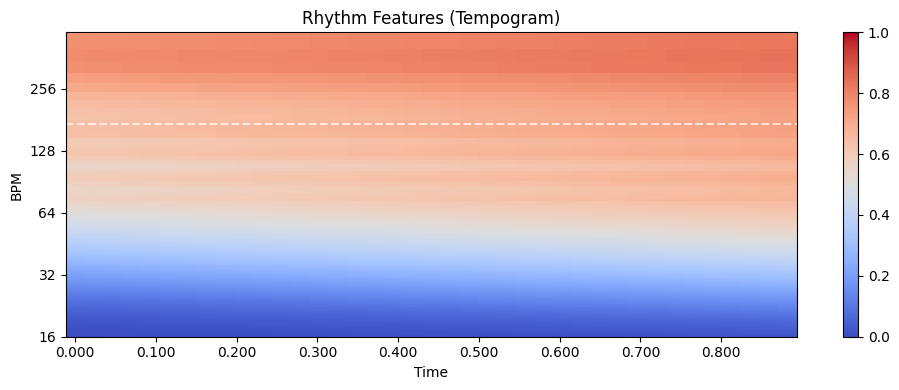

In [32]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_rhythm_features(tempo, rhythm_features):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(rhythm_features, x_axis='time', y_axis='tempo')
    plt.colorbar()
    plt.axhline(tempo, color='w', linestyle='--', alpha=0.7)
    plt.title('Rhythm Features (Tempogram)')
    plt.tight_layout()
    plt.show()


filename = df['speech'][0]
tempo, rhythm_features = extract_rhythm_features(filename)
plot_rhythm_features(tempo, rhythm_features)


In [33]:
def extract_spectral_contrast(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    
    return spectral_contrast

In [34]:
extract_spectral_contrast(df['speech'][0])

array([[14.32512406, 13.01818447, 13.2918005 , 14.7160135 ,  9.62969424,
        22.08717819, 17.51139362, 13.40719942,  7.55026975, 18.7357507 ,
        17.31786891, 12.91426592, 14.34637698, 12.72243472, 10.22701494,
        14.24555324, 13.10046279, 11.61513202, 14.45039717, 14.09204382,
        18.88683175, 19.8154204 , 18.23374109, 21.83976343, 16.55658382,
        15.59767944, 14.8613668 , 14.83507087, 15.56305957, 16.58499789,
        19.99063544, 17.93171779, 15.44844159, 14.02934335, 17.55633739,
        12.30501152, 11.67657002, 10.77323193, 10.6179779 ],
       [14.96774737, 22.68364464, 27.69686159, 23.86654756, 29.5183642 ,
        31.02081611, 33.60654576, 32.92300221, 24.86971797, 20.229777  ,
        16.39765871, 14.13997474, 12.83590232, 13.24393272, 11.53638369,
        18.08461694, 22.13328282, 24.09353887, 35.43706848, 31.12878132,
        36.31457845, 33.81143959, 35.90138498, 38.40422834, 36.42161262,
        33.12132873, 37.41758449, 35.14621538, 33.34060528, 28.

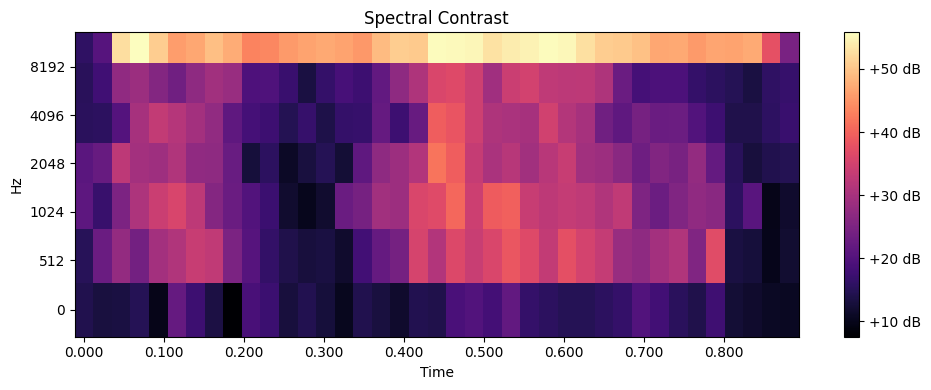

In [35]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_spectral_contrast(spectral_contrast):
    # Display the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectral_contrast, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectral Contrast')
    plt.tight_layout()
    plt.show()

# Example usage
filename = df['speech'][0]
spectral_contrast = extract_spectral_contrast(filename)
plot_spectral_contrast(spectral_contrast)


In [36]:
def extract_spectrogram_features(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    spectrogram = librosa.stft(y)
    spectrogram_features = librosa.amplitude_to_db(abs(spectrogram))
    
    return spectrogram_features

In [37]:
extract_spectrogram_features(df['speech'][0])

array([[  2.4718847,  10.848108 ,  11.255657 , ...,  -0.9226296,
          7.571231 ,   4.2958264],
       [ 11.267342 ,  14.815875 ,  11.922431 , ...,  12.432001 ,
         13.107647 ,   9.63415  ],
       [ 12.514466 ,  15.426355 ,   6.6455894, ...,  16.854967 ,
         14.607062 ,   2.336513 ],
       ...,
       [-41.366    , -41.366    , -41.366    , ..., -41.366    ,
        -41.366    , -41.366    ],
       [-41.366    , -41.366    , -41.366    , ..., -41.366    ,
        -41.366    , -41.366    ],
       [-41.366    , -41.366    , -41.366    , ..., -41.366    ,
        -41.366    , -41.366    ]], dtype=float32)

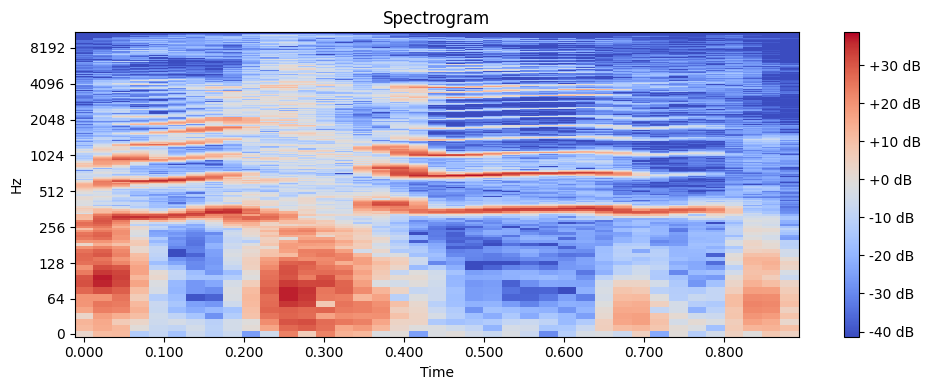

In [38]:
import librosa.display
import matplotlib.pyplot as plt

def plot_spectrogram_features(spectrogram_features, sr):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_features, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()
    
y, sr = librosa.load(df['speech'][0], duration=3, offset=0.5)
spectrogram_features = extract_spectrogram_features(df['speech'][0])

plot_spectrogram_features(spectrogram_features, sr)

In [39]:
X = [x for x in X_mfcc]
X = np.expand_dims(X, -1)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()
y.shape

(5600, 7)

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

In [41]:
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle= True)

Epoch 1/100
9/9 [==============================] - 4s 236ms/step - loss: 1.8005 - accuracy: 0.2864 - val_loss: 1.8701 - val_accuracy: 0.1696
Epoch 2/100
9/9 [==============================] - 2s 178ms/step - loss: 1.5046 - accuracy: 0.5040 - val_loss: 1.8002 - val_accuracy: 0.1196
Epoch 3/100
9/9 [==============================] - 2s 178ms/step - loss: 1.1293 - accuracy: 0.6435 - val_loss: 1.7475 - val_accuracy: 0.1143
Epoch 4/100
9/9 [==============================] - 2s 174ms/step - loss: 0.8265 - accuracy: 0.7022 - val_loss: 1.4041 - val_accuracy: 0.3107
Epoch 5/100
9/9 [==============================] - 2s 189ms/step - loss: 0.6268 - accuracy: 0.7705 - val_loss: 1.0676 - val_accuracy: 0.4848
Epoch 6/100
9/9 [==============================] - 1s 162ms/step - loss: 0.4982 - accuracy: 0.8172 - val_loss: 0.9132 - val_accuracy: 0.5554
Epoch 7/100
9/9 [==============================] - 2s 177ms/step - loss: 0.4289 - accuracy: 0.8379 - val_loss: 0.7204 - val_accuracy: 0.6223
Epoch 8/100
9

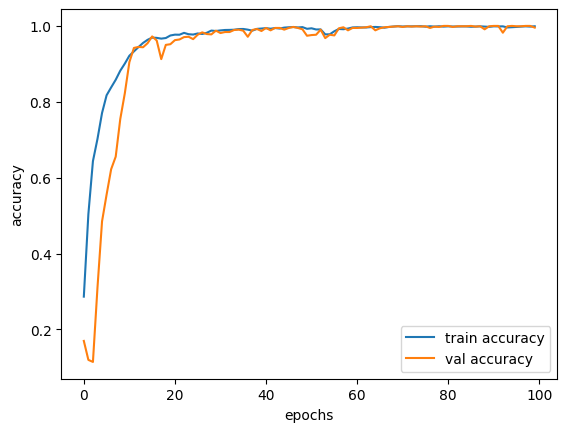

In [44]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [45]:
pitch_values = np.array(A_pitch)
pitch_values = pitch_values.reshape((pitch_values.shape[0], 1, 1))
pitch_values

array([[[ 5.6093235]],

       [[ 8.618578 ]],

       [[18.714079 ]],

       ...,

       [[25.24746  ]],

       [[ 6.3925314]],

       [[14.717339 ]]], dtype=float32)

In [46]:
history = model.fit(pitch_values, y, validation_split=0.2, epochs=100, batch_size=512, shuffle= True)

Epoch 1/100
9/9 [==============================] - 2s 70ms/step - loss: 2.2390 - accuracy: 0.1194 - val_loss: 2.0181 - val_accuracy: 0.0259
Epoch 2/100
9/9 [==============================] - 0s 15ms/step - loss: 1.9124 - accuracy: 0.1842 - val_loss: 2.1256 - val_accuracy: 0.0000e+00
Epoch 3/100
9/9 [==============================] - 0s 16ms/step - loss: 1.8856 - accuracy: 0.1935 - val_loss: 2.1138 - val_accuracy: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 0s 15ms/step - loss: 1.8703 - accuracy: 0.1973 - val_loss: 2.1451 - val_accuracy: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 0s 15ms/step - loss: 1.8562 - accuracy: 0.2183 - val_loss: 2.1631 - val_accuracy: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 0s 16ms/step - loss: 1.8443 - accuracy: 0.2094 - val_loss: 2.1769 - val_accuracy: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 0s 15ms/step - loss: 1.8439 - accuracy: 0.2136 - val_loss: 2.1756 - val_accuracy: 0.0000e

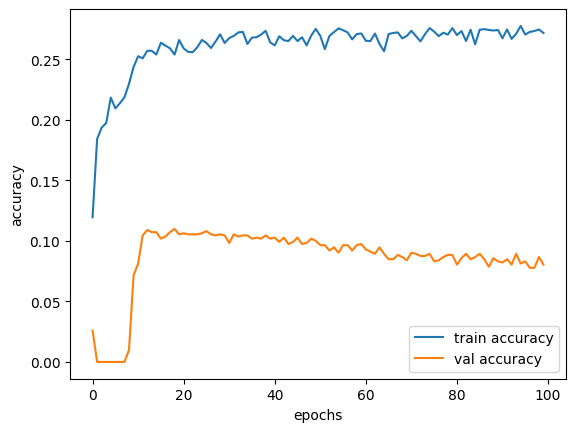

In [47]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()